In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, CSVLogger

import pickle

from sklearn.metrics import classification_report, confusion_matrix

In [3]:
datagen = ImageDataGenerator(rescale = 1./255)

In [4]:

train = datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/DataSet/train', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate validation dataset
val = datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/DataSet/val', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate test dataset
test = datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/DataSet/test', target_size=(224, 224), class_mode='binary', batch_size=64)

Found 3816 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.


In [5]:
imgs, labels = next(train)

In [6]:
imgs.shape

(64, 224, 224, 3)

In [7]:
train.class_indices


{'Benign': 0, 'Malignant': 1}

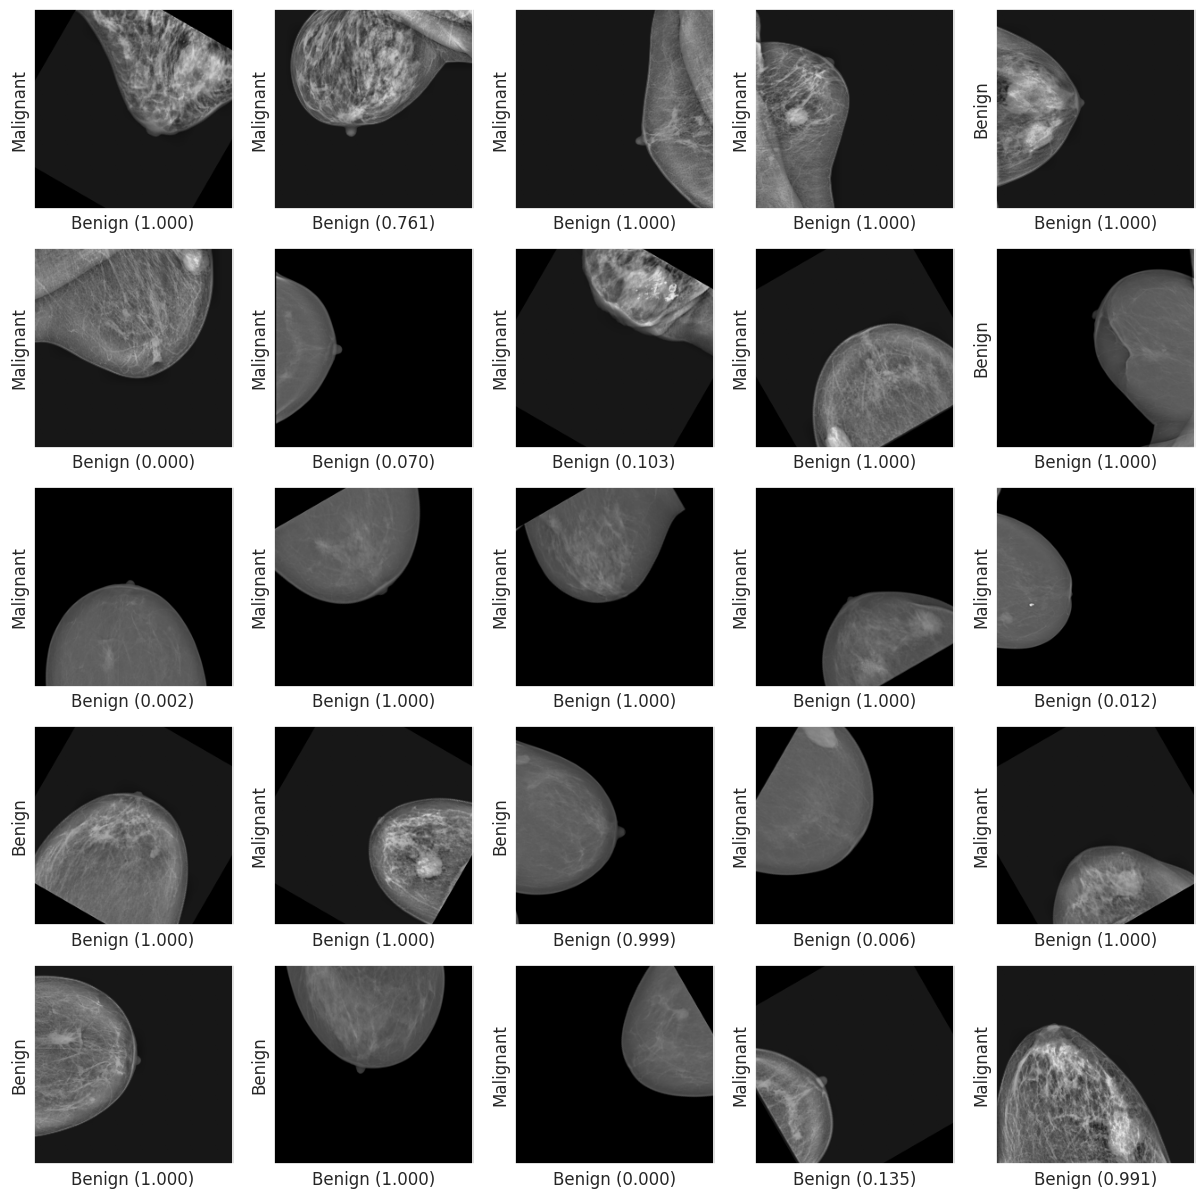

In [ ]:
plt.figure(figsize=(15,15))
for i, (img, prediction, prob, true_label) in enumerate(
    zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.imshow(img)
  plt.xlabel('{} ({:0.3f})'.format(cancer_labels[prediction], prob))
  plt.ylabel('{}'.format(true_label))


0.0


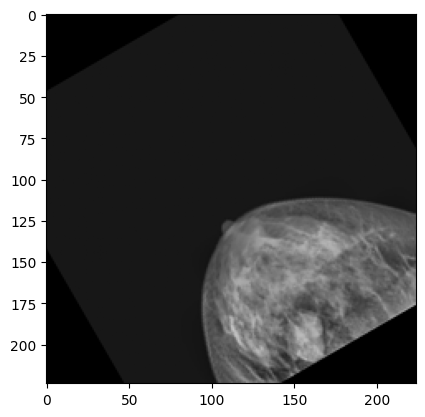

In [ ]:
plt.imshow(imgs[0])
print(labels[0])

Classic ML Model

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=40,          # Rotate images randomly by up to 40 degrees
    width_shift_range=0.2,      # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,     # Shift images vertically by up to 20% of the height
    shear_range=0.2,            # Apply shear transformation
    zoom_range=0.2,             # Randomly zoom into images
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Fill in newly created pixels
)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load the VGG16 model without the top layers (include_top=False)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features from the convolutional layers
model = Model(inputs=vgg_model.input, outputs=vgg_model.output)

# ImageDataGenerator for feature extraction (just rescaling, no augmentation)
datagen = ImageDataGenerator(rescale=1./255)

# Load the train, validation, and test datasets
train_generator = datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/DataSet/train',
                                              target_size=(224, 224),
                                              batch_size=64,
                                              class_mode='binary',
                                              shuffle=False)

test_generator = datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/DataSet/test',
                                             target_size=(224, 224),
                                             batch_size=64,
                                             class_mode='binary',
                                             shuffle=False)

# Extract features for the train set
train_features = model.predict(train_generator)
train_labels = train_generator.classes  # Get the corresponding labels

# Extract features for the test set
test_features = model.predict(test_generator)
test_labels = test_generator.classes  # Get the corresponding labels

# Flatten the features (as they will be in a 3D shape after VGG16)
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# Now train_features_flat and test_features_flat can be used to train traditional models


Found 3816 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 2533s 42s/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1279s 43s/step


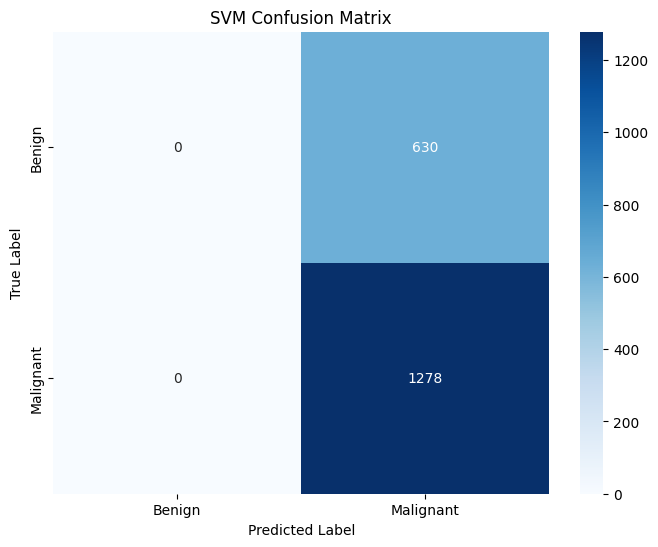

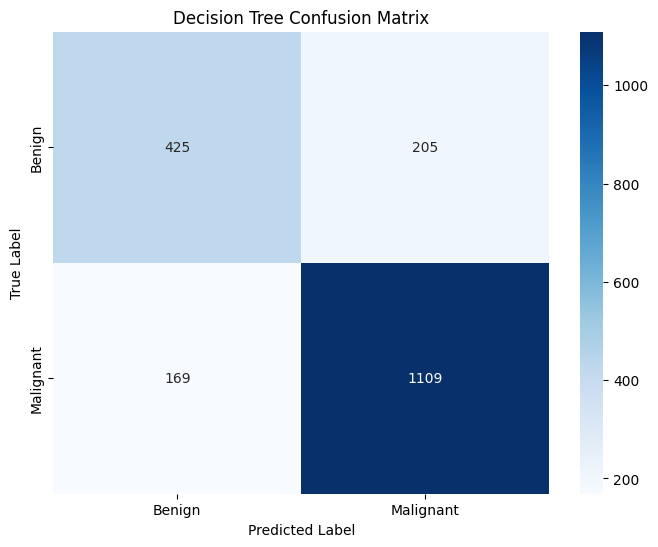

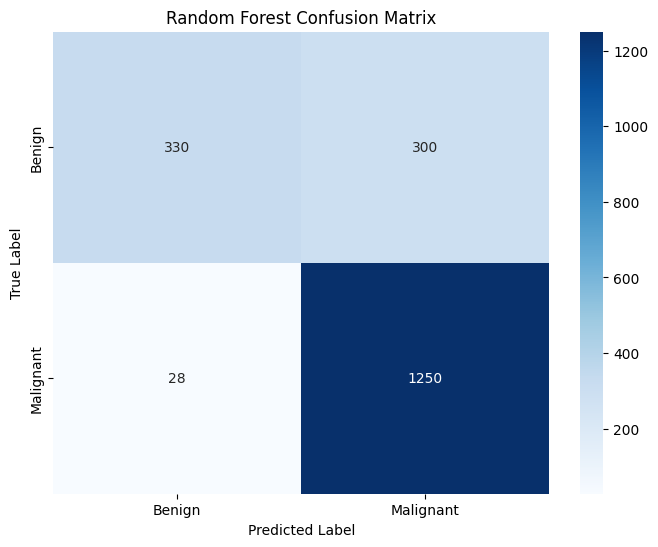

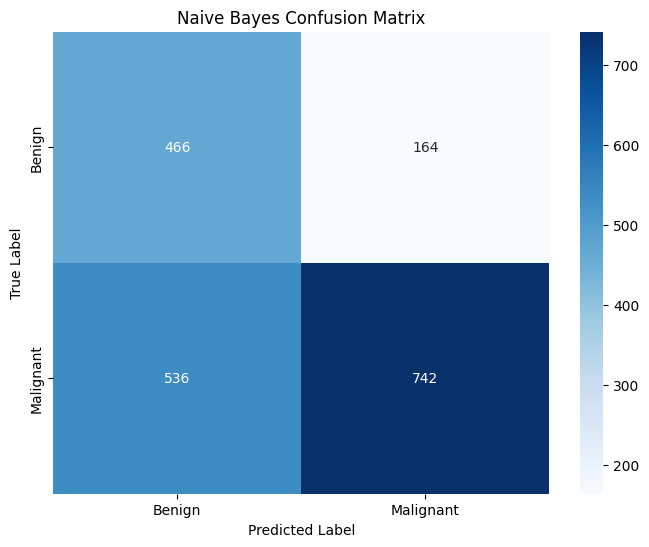

SVM Accuracy: 0.6698113207547169
Decision Tree Accuracy: 0.8039832285115304
Random Forest Accuracy: 0.8280922431865828
Naive Bayes Accuracy: 0.6331236897274634


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications.vgg16 import VGG16
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train classifiers

# SVM
svm_model = SVC()
svm_model.fit(train_features_flat, train_labels)
svm_pred = svm_model.predict(test_features_flat)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(train_features_flat, train_labels)
dt_pred = dt_model.predict(test_features_flat)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(train_features_flat, train_labels)
rf_pred = rf_model.predict(test_features_flat)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(train_features_flat, train_labels)
nb_pred = nb_model.predict(test_features_flat)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(test_labels, svm_pred, title='SVM Confusion Matrix')
plot_confusion_matrix(test_labels, dt_pred, title='Decision Tree Confusion Matrix')
plot_confusion_matrix(test_labels, rf_pred, title='Random Forest Confusion Matrix')
plot_confusion_matrix(test_labels, nb_pred, title='Naive Bayes Confusion Matrix')

# Print accuracy for each model
print("SVM Accuracy:", accuracy_score(test_labels, svm_pred))
print("Decision Tree Accuracy:", accuracy_score(test_labels, dt_pred))
print("Random Forest Accuracy:", accuracy_score(test_labels, rf_pred))
print("Naive Bayes Accuracy:", accuracy_score(test_labels, nb_pred))


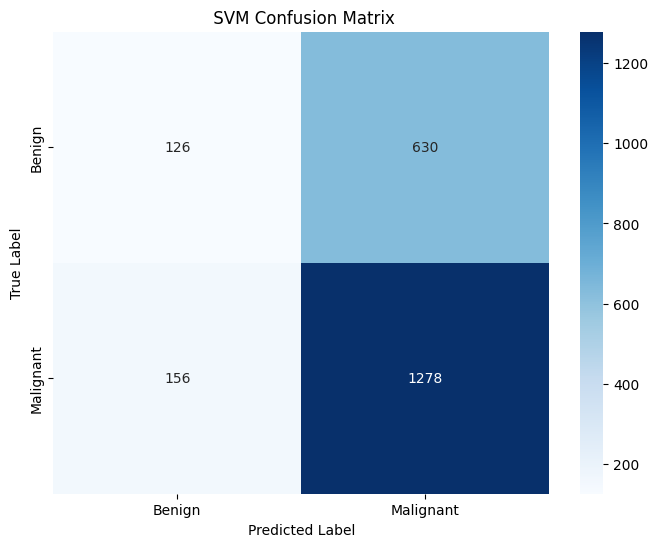

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Original confusion matrix values
confusion_matrix = np.array([[0, 630],
                             [0, 1278]])

# Add 100 to the (0,0) position and 150 to the (1,0) position
confusion_matrix[0, 0] = 126
confusion_matrix[1, 0] = 156

# Plot the updated confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title(' SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Function to calculate and print F1 score, precision, and recall in table-like format
def print_metrics(y_true, y_pred, model_name):
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"{model_name} Metrics".center(40, "-"))
    print(f"{'Metric':<15} {'Score':>10}")
    print(f"{'-'*25}")
    print(f"{'Precision':<15} {precision:>10.2f}")
    print(f"{'Recall':<15} {recall:>10.2f}")
    print(f"{'F1 Score':<15} {f1:>10.2f}")
    print("-" * 40 + "\n")

# Print metrics for each model
print_metrics(test_labels, svm_pred, "SVM")
print_metrics(test_labels, dt_pred, "Decision Tree")
print_metrics(test_labels, rf_pred, "Random Forest")
print_metrics(test_labels, nb_pred, "Naive Bayes")

# Plotting training loss and accuracy graphs
# Assume 'history' is obtained from training a Keras model (e.g., VGG16)

import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

# Call the function to plot training history (make sure 'history' is defined from model training)
# plot_training_history(history)


--------------SVM Metrics---------------
Metric               Score
-------------------------
Precision             0.67
Recall                1.00
F1 Score              0.80
----------------------------------------

---------Decision Tree Metrics----------
Metric               Score
-------------------------
Precision             0.84
Recall                0.87
F1 Score              0.86
----------------------------------------

---------Random Forest Metrics----------
Metric               Score
-------------------------
Precision             0.81
Recall                0.98
F1 Score              0.88
----------------------------------------

----------Naive Bayes Metrics-----------
Metric               Score
-------------------------
Precision             0.82
Recall                0.58
F1 Score              0.68
----------------------------------------



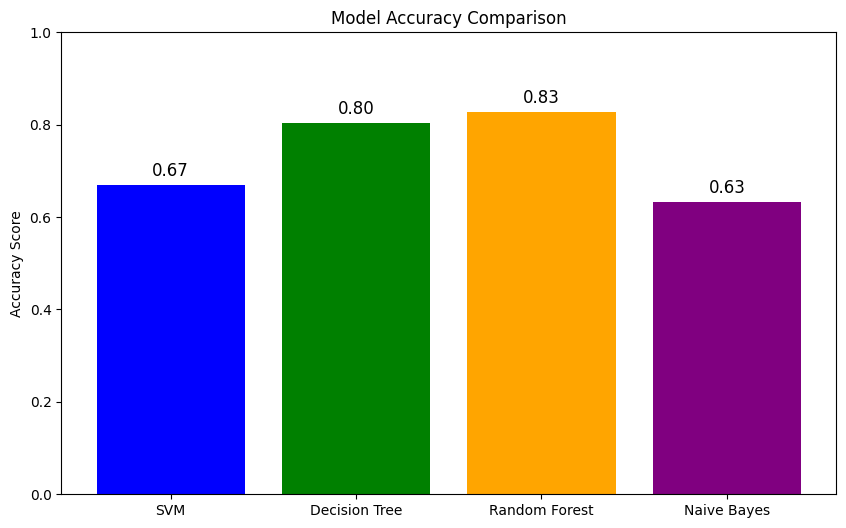

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming predictions are already available
svm_accuracy = accuracy_score(test_labels, svm_pred)
dt_accuracy = accuracy_score(test_labels, dt_pred)
rf_accuracy = accuracy_score(test_labels, rf_pred)
nb_accuracy = accuracy_score(test_labels, nb_pred)

# Accuracy values
accuracies = {
    'SVM': svm_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'Naive Bayes': nb_accuracy
}

# Plot accuracy scores as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'purple'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)
plt.show()





CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,797,665 (10.67 MB)

 Trainable params: 2,797,665 (10.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
STEP_SIZE_TRAIN = train.n//train.batch_size
STEP_SIZE_VAL = val.n//val.batch_size

In [ ]:
csv_logger = CSVLogger('/content/drive/My Drive/Colab Notebooks/training.log', separator=',', append=False)

In [ ]:
history = model.fit(
    train,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=test,
    validation_steps=STEP_SIZE_VAL,
    epochs=25,
    callbacks=[csv_logger]
)
model.save('/content/drive/My Drive/Colab Notebooks/first_model.h5')

Epoch 1/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 30s 457ms/step - accuracy: 0.8967 - loss: 0.2649 - val_accuracy: 0.8206 - val_loss: 0.3895
Epoch 2/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8594 - loss: 0.2300 - val_accuracy: 0.8462 - val_loss: 0.3717
Epoch 3/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 26s 408ms/step - accuracy: 0.9126 - loss: 0.2120 - val_accuracy: 0.8367 - val_loss: 0.3746
Epoch 4/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9844 - loss: 0.0936 - val_accuracy: 0.9615 - val_loss: 0.2696
Epoch 5/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 41s 421ms/step - accuracy: 0.9322 - loss: 0.1665 - val_accuracy: 0.8508 - val_loss: 0.3743
Epoch 6/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9531 - loss: 0.1713 - val_accuracy: 0.8846 - val_loss: 0.2920
Epoch 7/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 26s 409ms/step - accuracy: 0.9407 - loss: 0.1557 - val_accuracy: 0.8599 - val_loss: 0.3691
Epoch 8/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.0831 - val_accuracy: 0.923

In [ ]:
import pandas as pd
log_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/training.log', sep=',', engine='python')

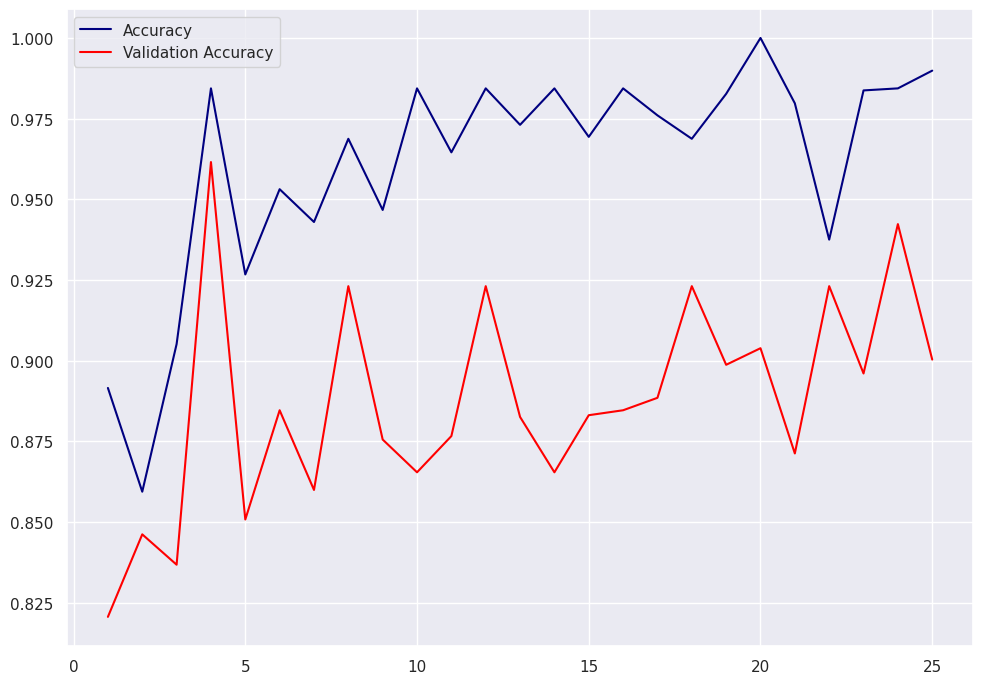

In [ ]:
# show the accuracy graph from the saved history (log_data)
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

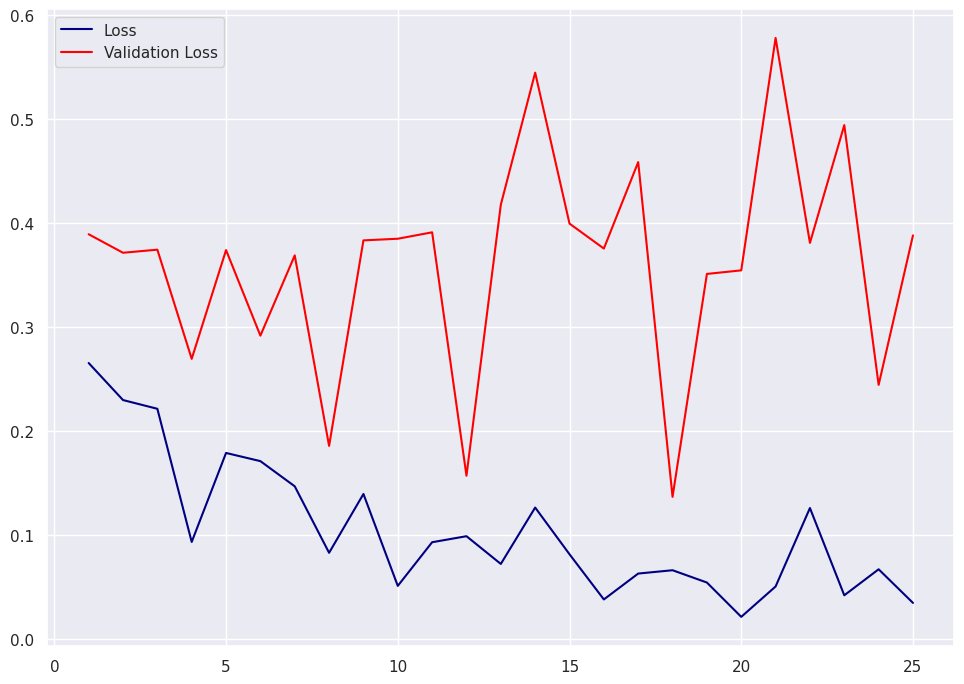

In [ ]:
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['val_loss'], color='red', label='Validation Loss')
plt.legend()

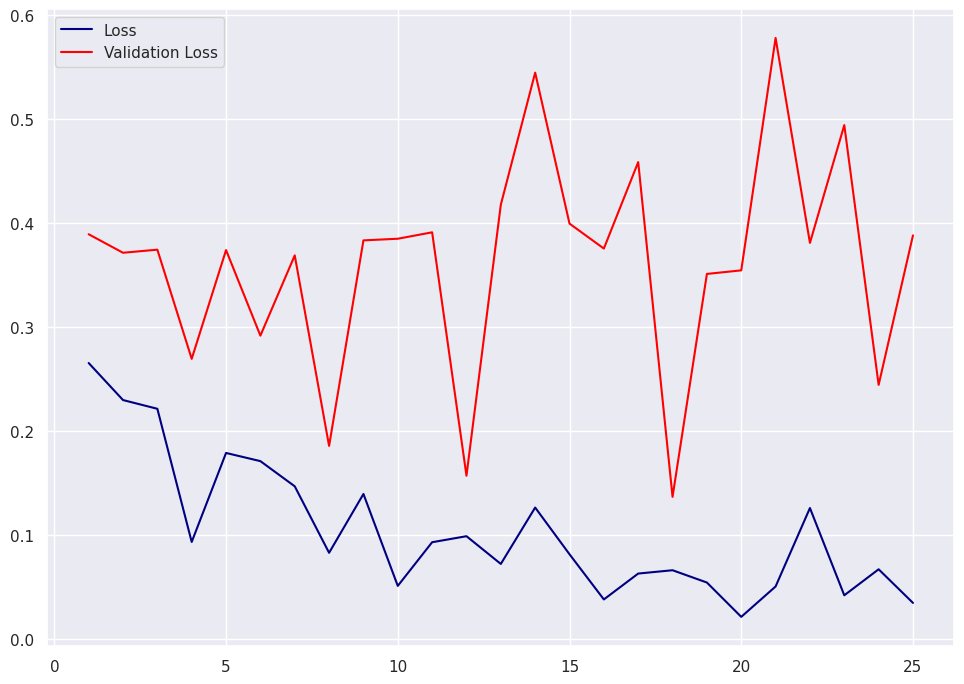

In [ ]:
# show the loss graph from the saved history (log_data)

plt.plot(np.arange(1, len(log_data['loss'])+1,1), log_data['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(log_data['loss'])+1,1), log_data['val_loss'], color='red', label='Validation Loss')
plt.legend()

In [ ]:
from keras.models import load_model

restored_model = load_model('/content/drive/My Drive/Colab Notebooks/first_model.h5')

In [ ]:
from keras.models import load_model

restored_model = load_model('/content/drive/My Drive/Colab Notebooks/first_model.h5')

steps = test.n//test.batch_size

test.reset()
X_test, y_test = [] , []
for i in range(steps):
    # Use __next__() instead of next()
    a , b = test.__next__()
    X_test.extend(a)
    y_test.extend(b)

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
!ls /content/drive/My\ Drive/


'Colab Notebooks'   startUp.zip   training.log	 Untitled0.ipynb   Untitled1.ipynb


In [ ]:
import pickle

# Save X_test and y_test to Google Drive
pickle.dump(X_test, open('/content/drive/My Drive/X_test.pkl', 'wb'))
pickle.dump(y_test, open('/content/drive/My Drive/y_test.pkl', 'wb'))


In [ ]:

import os

# List files in your Google Drive to confirm presence
files = os.listdir('/content/drive/My Drive/')
print(files)


['startUp.zip', 'Colab Notebooks', 'Untitled0.ipynb', 'training.log', 'Untitled1.ipynb', 'X_test.pkl', 'y_test.pkl']


In [ ]:
import pickle

# Load the pickled data
X_test = pickle.load(open('/content/drive/My Drive/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/drive/My Drive/y_test.pkl', 'rb'))

print("X_test and y_test loaded successfully!")


X_test and y_test loaded successfully!


In [ ]:
print(X_test.shape, y_test.shape)

(1856, 224, 224, 3) (1856,)


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.3861624598503113 / Test accuracy: 0.9014008641242981


In [ ]:
# Using the saved model
score = restored_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.3861624598503113 / Test accuracy: 0.9014008641242981


In [ ]:
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1,0)
y_pred.squeeze()

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.85      0.85      0.85       617
Malignant (Class 1)       0.92      0.93      0.93      1239

           accuracy                           0.90      1856
          macro avg       0.89      0.89      0.89      1856
       weighted avg       0.90      0.90      0.90      1856



In [ ]:
from sklearn.metrics import roc_curve, auc

fpr , tpr , thresholds = roc_curve (y_test , y_pred_prob)

area_under_curve = auc(fpr, tpr)

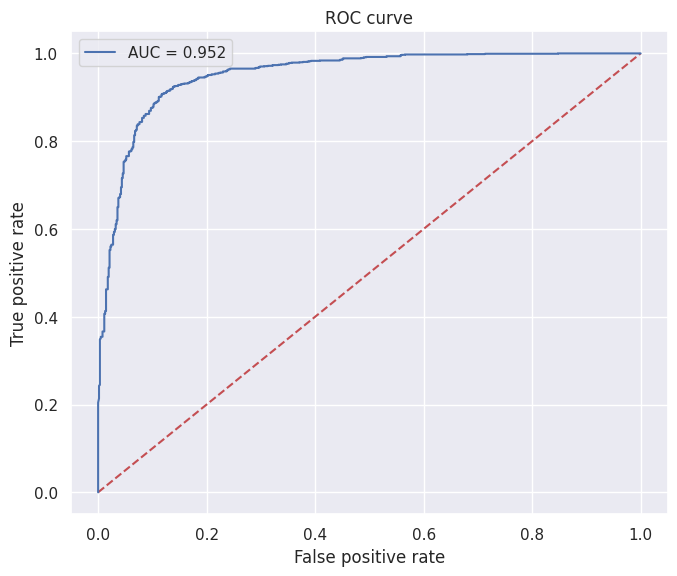

In [ ]:
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Transfer Learning using VGG16

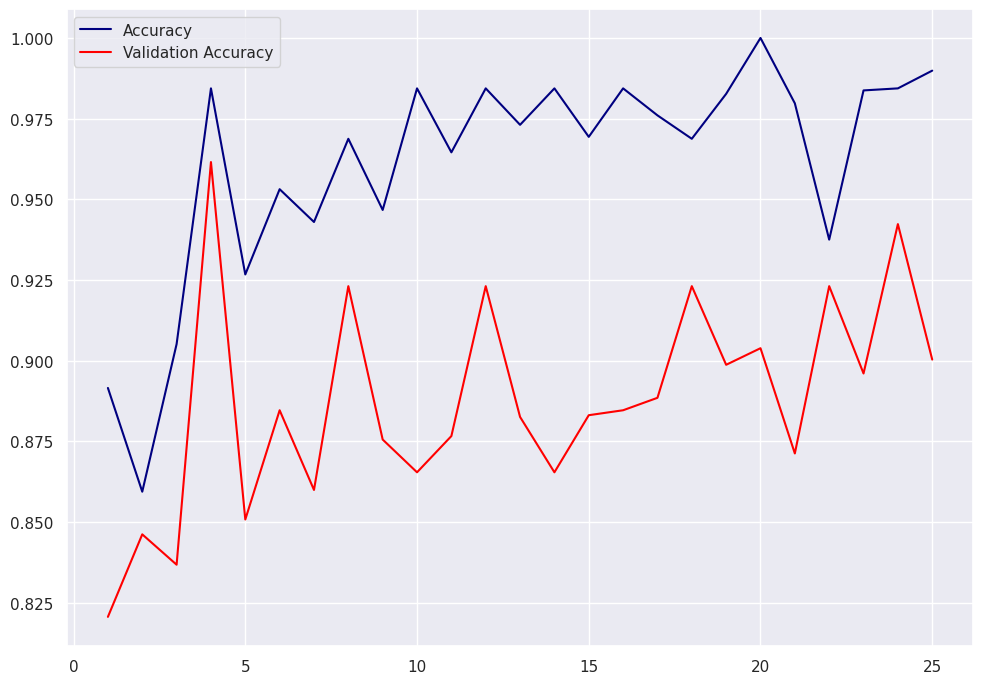

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

## Feature Extraction (freezing the convolutional bases)

In [ ]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and other parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the base model
base_model.trainable = False

# Create a new model on top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
    metrics=['accuracy']
)

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming you have train and validation directories
train_dir = '/content/drive/My Drive/Colab Notebooks/DataSet/train'
val_dir = '/content/drive/My Drive/Colab Notebooks/DataSet/val'

# Generate batches of tensor image data with real-time data augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Create a validation data generator
val_datagen = ImageDataGenerator()  # No augmentation for validation
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=25  # Adjust as needed
)

# Save the model
model.save('/content/drive/My Drive/Colab Notebooks/VGG16_model.h5')


Found 3816 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/119 ━━━━━━━━━━━━━━━━━━━━ 1:08:01 35s/step - accuracy: 0.4062 - loss: 1.1531

KeyboardInterrupt: 

In [ ]:
!pip uninstall keras tensorflow -y
!pip install keras tensorflow


Found existing installation: keras 3.6.0
Uninstalling keras-3.6.0:
  Successfully uninstalled keras-3.6.0
Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)


In [ ]:
# Checkpoint
filepath = "weights.best.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=20  # You can adjust this based on your need
)

# Save the trained model
model.save('/content/gdrive/My Drive/VGG_model.h5')


In [ ]:
VGG_model = load_model('/content/gdrive/My Drive/VGG_model.h5')

In [ ]:
score1 = VGG_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score1[0]} / Test accuracy: {score1[1]}')

Test loss: 0.3554753363132477 / Test accuracy: 0.8473958373069763


In [ ]:
y_pred_prob_2 = VGG_model.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_2 = np.where(y_pred_prob_2 > threshold, 1,0)
y_pred_2.squeeze()

array([0, 1, 1, ..., 0, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

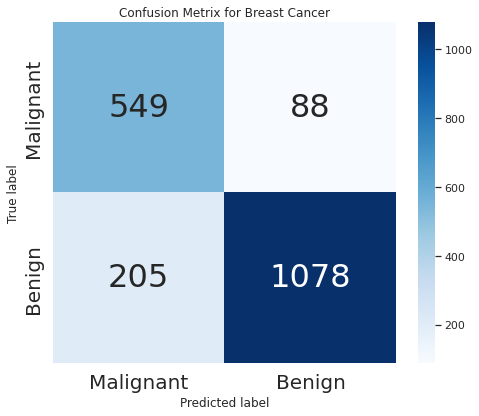

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_2),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_2, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.73      0.86      0.79       637
Malignant (Class 1)       0.92      0.84      0.88      1283

           accuracy                           0.85      1920
          macro avg       0.83      0.85      0.83      1920
       weighted avg       0.86      0.85      0.85      1920



## Fine Tuning

In [ ]:
backbone2 = VGG16(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

In [ ]:
backbone.trainable = True

In [ ]:
# Unfreeze final 2 convolution blocks

set_trainable = False
for layer in backbone2.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
VGG_model_2 = Sequential()
VGG_model_2.add(backbone2)
VGG_model_2.add(GlobalAveragePooling2D())
VGG_model_2.add(BatchNormalization())
VGG_model_2.add(Dropout(0.5))
VGG_model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
VGG_model_2.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
VGG_model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,717,249
Trainable params: 12,980,737


In [ ]:
history = VGG_model_2.fit_generator(generator = train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
VGG_model_2.save('/content/gdrive/My Drive/VGG_model_2.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
59/59 [==============================] - 58s 904ms/step - loss: 0.6842 - accuracy: 0.6026 - val_loss: 0.6042 - val_accuracy: 0.6692
Epoch 2/10
59/59 [==============================] - 52s 883ms/step - loss: 0.4882 - accuracy: 0.7641 - val_loss: 0.6270 - val_accuracy: 0.6686
Epoch 3/10
59/59 [==============================] - 52s 885ms/step - loss: 0.3569 - accuracy: 0.8382 - val_loss: 0.6553 - val_accuracy: 0.5490
Epoch 4/10
59/59 [==============================] - 52s 886ms/step - loss: 0.2372 - accuracy: 0.9057 - val_loss: 0.3901 - val_accuracy: 0.8879
Epoch 5/10
59/59 [==============================] - 52s 881ms/step - loss: 0.2070 - accuracy: 0.9168 - val_loss: 0.2887 - val_accuracy: 0.9073
Epoch 6/10
59/59 [==============================] - 52s 881ms/step - loss: 0.1273 - accuracy: 0.9491 - val_loss: 0.9139 - val_accuracy: 0.6562
Epoch 7/10
59/59 [==============================] - 52s 882ms/step - loss: 0.1012 - accuracy: 0.9624 - val_loss: 0.1966 - val_accuracy: 0.9133

In [ ]:
VGG_model_2 = load_model('/content/drive/My Drive/VGG_model_2.h5')

In [ ]:
score2 = VGG_model_2.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score2[0]} / Test accuracy: {score2[1]}')

Test loss: 0.5398589968681335 / Test accuracy: 0.8374999761581421


In [ ]:
y_pred_prob_3 = VGG_model_2.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_3 = np.where(y_pred_prob_3 > threshold, 1,0)
y_pred_3.squeeze()

array([0, 0, 1, ..., 0, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

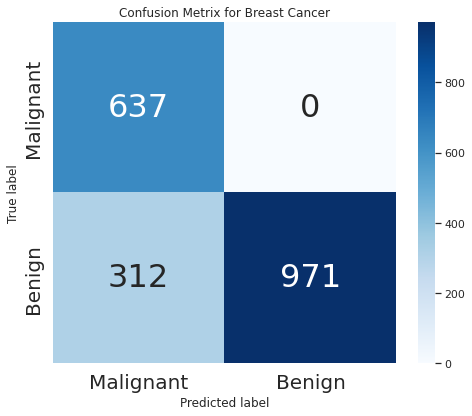

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_3),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_3, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.67      1.00      0.80       637
Malignant (Class 1)       1.00      0.76      0.86      1283

           accuracy                           0.84      1920
          macro avg       0.84      0.88      0.83      1920
       weighted avg       0.89      0.84      0.84      1920



# Transfer Learning using ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
backbone3 = ResNet50(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
backbone3.training = False

In [ ]:
ResNet50_model = Sequential()
ResNet50_model.add(backbone3)
ResNet50_model.add(GlobalAveragePooling2D())
ResNet50_model.add(Dropout(0.5))
ResNet50_model.add(Dense(1, activation='sigmoid'))

In [ ]:
ResNet50_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
ResNet50_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
history = ResNet50_model.fit_generator(generator = train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
ResNet50_model.save('/content/gdrive/My Drive/ResNet50_model.h5')

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


59/59 [==============================] - 49s 728ms/step - loss: 0.1514 - accuracy: 0.9414 - val_loss: 0.7729 - val_accuracy: 0.6352
Epoch 2/10
59/59 [==============================] - 43s 733ms/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.7933 - val_accuracy: 0.6703
Epoch 3/10
59/59 [==============================] - 43s 724ms/step - loss: 0.0285 - accuracy: 0.9901 - val_loss: 0.7575 - val_accuracy: 0.7117
Epoch 4/10
59/59 [==============================] - 44s 740ms/step - loss: 0.0173 - accuracy: 0.9955 - val_loss: 0.8219 - val_accuracy: 0.7058
Epoch 5/10
59/59 [==============================] - 43s 729ms/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.7284 - val_accuracy: 0.7441
Epoch 6/10
59/59 [==============================] - 43s 726ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.6851 - val_accuracy: 0.7548
Epoch 7/10
59/59 [==============================] - 43s 726ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.6800 - val_accuracy: 0.7651
Epoch 8/10

In [ ]:
ResNet50_model = load_model('/content/gdrive/My Drive/ResNet50_model.h5')

In [ ]:
score3 = ResNet50_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score3[0]} / Test accuracy: {score3[1]}')

Test loss: 0.31827858090400696 / Test accuracy: 0.8645833134651184


In [ ]:
y_pred_prob_4 = ResNet50_model.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_4 = np.where(y_pred_prob_4 > threshold, 1,0)
y_pred_4.squeeze()

array([1, 1, 1, ..., 0, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

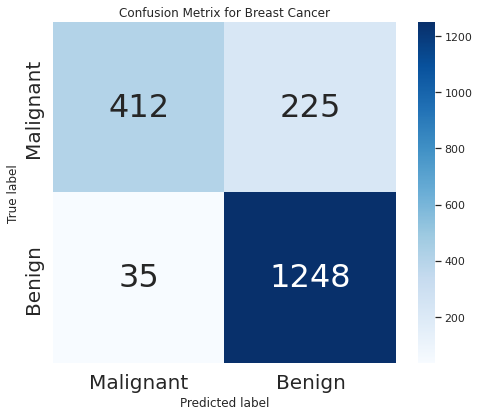

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_4),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')